In [1]:
from pycaret.classification import *
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="1"


In [3]:
# Load training set
train = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-17_18-04-22_train.csv' , header=0)
test = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-17_18-04-22_test.csv' , header=0)
val = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-17_18-04-22_val.csv' , header=0)

# add column to identify train, test and val
train['set'] = 'train'
test['set'] = 'test'
val['set'] = 'val'

# Merge train, test and val
df = pd.concat([train, test, val], axis=0)

# drop ground truth and link col
df = df.drop(['ground_truth'], axis=1)

df

NameError: name 'data' is not defined

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,set
0,-0.039281,0.045129,0.060632,0.040718,0.019589,-0.037644,-0.046621,0.035634,-0.036399,0.040565,...,-0.048659,0.048578,0.049714,0.049720,-0.037400,-0.041995,-0.043189,0.019707,-0.011275,train
1,-0.036916,0.028429,0.049426,0.027237,-0.035879,-0.043270,-0.047764,0.030260,-0.019672,0.043986,...,-0.041035,0.056026,0.044111,-0.030228,-0.000461,-0.042661,-0.042689,0.047804,0.001308,train
2,-0.045044,-0.040876,0.053277,-0.023103,-0.040964,-0.057454,-0.043918,0.036199,-0.010271,0.061459,...,-0.006611,0.060048,0.041527,0.000094,-0.044123,0.041733,-0.054082,0.041215,-0.038703,train
3,-0.185021,0.170344,-0.216889,-0.203051,-0.165906,0.221980,0.152171,0.172068,-0.212461,-0.209708,...,-0.178775,-0.182236,-0.190973,0.083386,0.007624,-0.135215,-0.024115,0.182624,-0.197361,train
4,-0.037551,0.039643,0.025630,-0.039976,0.007117,-0.040056,-0.035566,0.048091,-0.042153,0.026733,...,-0.036329,0.045488,0.043615,0.031605,0.042898,-0.035605,-0.043298,0.020484,-0.012389,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832531,0.000488,-0.018213,0.037319,-0.037544,0.032193,-0.011686,-0.015580,-0.048626,0.018086,0.041432,...,-0.002887,0.007249,0.027118,-0.006408,0.018064,0.011075,-0.000410,0.022717,0.032426,val
2832532,0.052878,-0.061081,0.061362,-0.055653,-0.011013,-0.073393,-0.055194,0.024313,-0.040196,0.064986,...,0.068665,0.051774,-0.054903,-0.031336,-0.060177,0.069443,-0.076120,-0.030139,0.058012,val
2832533,-0.006414,-0.016929,0.023301,-0.029723,0.015577,-0.011622,-0.026830,-0.045532,0.029827,0.039806,...,-0.012730,0.020308,0.034114,-0.025278,0.003062,0.020570,-0.007069,0.039509,0.040183,val
2832534,-0.015009,-0.039170,0.020469,-0.010572,0.018136,-0.025615,-0.016906,-0.047212,0.019065,0.025992,...,0.020264,0.035035,0.018661,-0.024460,-0.003234,0.029622,-0.009954,0.008429,0.025477,val


In [7]:
# split combined embeddings into individual nodes
df1 = df.iloc[:, :100] # Head node
df2 = df.iloc[:, 100:200] # Tail node

# add the ground_truth col
df1['set'] = df['set']
df2['set'] = df['set']

# drop indexes
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# rename columns of df2 to be the same as df1
df2.columns = df1.columns

# merge the two dataframes
df = pd.concat([df1, df2], axis=0)

# Replace 'ground_truth' col by its natural language meaning
df = df.drop_duplicates()

df


ValueError: Length mismatch: Expected axis has 1 elements, new values have 101 elements

In [8]:
df1

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,set
0,-0.039281,0.045129,0.060632,0.040718,0.019589,-0.037644,-0.046621,0.035634,-0.036399,0.040565,...,-0.048659,0.048578,0.049714,0.049720,-0.037400,-0.041995,-0.043189,0.019707,-0.011275,train
1,-0.036916,0.028429,0.049426,0.027237,-0.035879,-0.043270,-0.047764,0.030260,-0.019672,0.043986,...,-0.041035,0.056026,0.044111,-0.030228,-0.000461,-0.042661,-0.042689,0.047804,0.001308,train
2,-0.045044,-0.040876,0.053277,-0.023103,-0.040964,-0.057454,-0.043918,0.036199,-0.010271,0.061459,...,-0.006611,0.060048,0.041527,0.000094,-0.044123,0.041733,-0.054082,0.041215,-0.038703,train
3,-0.185021,0.170344,-0.216889,-0.203051,-0.165906,0.221980,0.152171,0.172068,-0.212461,-0.209708,...,-0.178775,-0.182236,-0.190973,0.083386,0.007624,-0.135215,-0.024115,0.182624,-0.197361,train
4,-0.037551,0.039643,0.025630,-0.039976,0.007117,-0.040056,-0.035566,0.048091,-0.042153,0.026733,...,-0.036329,0.045488,0.043615,0.031605,0.042898,-0.035605,-0.043298,0.020484,-0.012389,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665067,0.000488,-0.018213,0.037319,-0.037544,0.032193,-0.011686,-0.015580,-0.048626,0.018086,0.041432,...,-0.002887,0.007249,0.027118,-0.006408,0.018064,0.011075,-0.000410,0.022717,0.032426,val
5665068,0.052878,-0.061081,0.061362,-0.055653,-0.011013,-0.073393,-0.055194,0.024313,-0.040196,0.064986,...,0.068665,0.051774,-0.054903,-0.031336,-0.060177,0.069443,-0.076120,-0.030139,0.058012,val
5665069,-0.006414,-0.016929,0.023301,-0.029723,0.015577,-0.011622,-0.026830,-0.045532,0.029827,0.039806,...,-0.012730,0.020308,0.034114,-0.025278,0.003062,0.020570,-0.007069,0.039509,0.040183,val
5665070,-0.015009,-0.039170,0.020469,-0.010572,0.018136,-0.025615,-0.016906,-0.047212,0.019065,0.025992,...,0.020264,0.035035,0.018661,-0.024460,-0.003234,0.029622,-0.009954,0.008429,0.025477,val


In [9]:
df2

,set
0,train
1,train
2,train
3,train
4,train
...,...
5665067,val
5665068,val
5665069,val
5665070,val


In [ ]:
from sklearn.manifold import TSNE

numeric_cols = df.drop(['set'], axis=1)  # Exclude 'ground_truth' and 'link' columns
tsne = TSNE(n_components=2)  # Specify the number of components you want to keep
tsne_result = tsne.fit_transform(numeric_cols)
df_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

ValueError: cannot reindex on an axis with duplicate labels

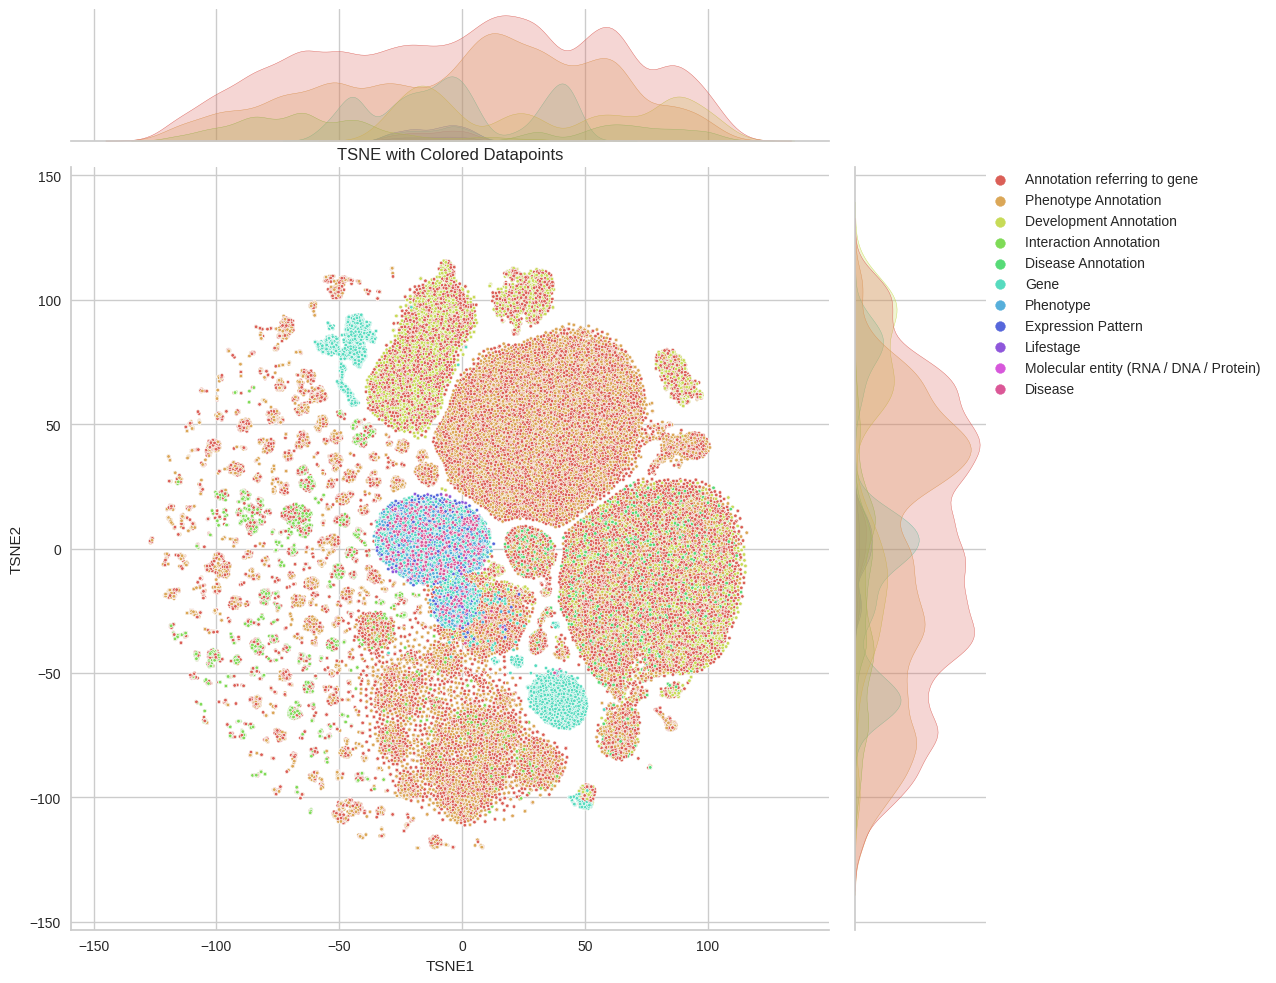

In [ ]:
g = sns.jointplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='set', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('TSNE1', 'TSNE2')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.title('TSNE with Colored Datapoints')
plt.show()
